11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


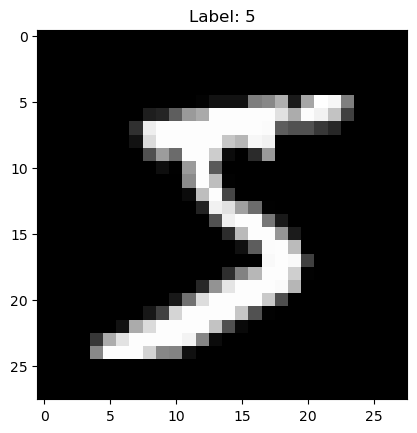

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Display the first image and its label
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


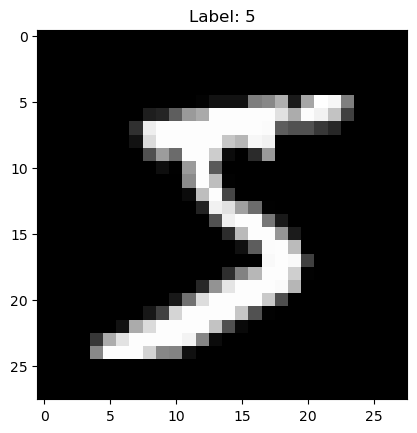

First image shape: (28, 28)
First label: 5


In [2]:
import matplotlib.pyplot as plt

# Display the first image and its label
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Display the shape of the images and labels
print(f"First image shape: {X_train[0].shape}")
print(f"First label: {y_train[0]}")


In [4]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\AIC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8596 - loss: 0.4922 - val_accuracy: 0.9514 - val_loss: 0.1613
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9587 - loss: 0.1404 - val_accuracy: 0.9631 - val_loss: 0.1218
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9716 - loss: 0.0937 - val_accuracy: 0.9671 - val_loss: 0.1073
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9807 - loss: 0.0661 - val_accuracy: 0.9724 - val_loss: 0.0923
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9857 - loss: 0.0502 - val_accuracy: 0.9721 - val_loss: 0.0954


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9709 - loss: 0.1001
Test accuracy: 0.973800003528595


In [10]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = predictions.argmax(axis=-1)

# Example: Print the first prediction and its corresponding label
print(f"First prediction: {predicted_labels[0]}")
print(f"First true label: {y_test[0]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
First prediction: 7
First true label: 7


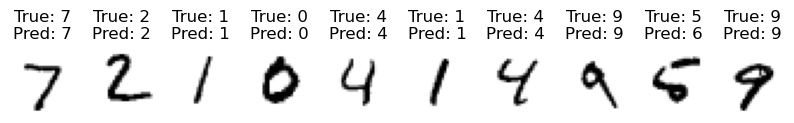

In [11]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, predictions, num=10):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(2, 10, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Plot some test images with predictions
plot_images(X_test, y_test, predicted_labels)


C:\Users\AIC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8624 - loss: 0.4875 - val_accuracy: 0.9574 - val_loss: 0.1518
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.9613 - loss: 0.1341 - val_accuracy: 0.9638 - val_loss: 0.1233
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9727 - loss: 0.0916 - val_accuracy: 0.9706 - val_loss: 0.1060
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9810 - loss: 0.0654 - val_accuracy: 0.9683 - val_loss: 0.1041
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9853 - loss: 0.0500 - val_accuracy: 0.9732 - val_loss: 0.0897
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9731 - loss: 0.0865
Test Accuracy: 0.9764000177383423
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2 

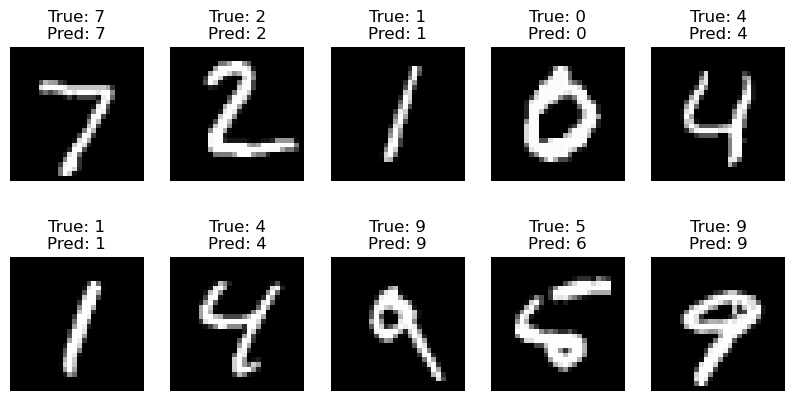

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = np.expand_dims(X_train, -1)  # Add channel dimension
X_test = np.expand_dims(X_test, -1)    # Add channel dimension
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

# Function to plot images with predictions
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Plot some test images with predictions
plot_images(X_test, true_labels, predicted_labels)
